In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide: Chapter 18: Intervals

Intervals, or distances in pitch space between two pitches, are fundamental concepts of music theory, dating back at least to Ancient Greece, and are thus fundamental concepts in `music21` as well.

Different forms of music theory analysis, such as tonal theory, modal theory, and chromatic (atonal) theory use different kinds of intervals. Thus `music21` has a collection of interval classes that can be used in different situations.  They are all found in the :ref:`interval <moduleInterval>` module, which also contains some handy tools for creating and comparing intervals.  This chapter of the User's Guide explains how to create and use Interval objects.

## The `Interval` Class

We're going to break from the tradition of starting with the simplest objects and begin with the most flexible but also complex object, simply called :class:`~music21.interval.Interval`, since if you're going to learn about even a single Interval, it might as well be the most useful one.

We can create an `Interval` object by giving an abbreviation for the interval as a string.  For instance, if we want to model a perfect fifth, we'll use the string `"P5"`:

In [2]:
i = interval.Interval('P5')
i

<music21.interval.Interval P5>

Now we can see some properties of Interval objects:

In [3]:
i.niceName

'Perfect Fifth'

In [4]:
i.name

'P5'

In [5]:
i.semitones

7

In [6]:
i.isStep

False

Here's a rule that assumes a musical context from the late fourteenth century to the end of the nineteenth century:

In [7]:
i.isConsonant()

True

What do we need to make this interval add up to an octave?  That's the complement:

In [8]:
i.complement

<music21.interval.Interval P4>

The `.intervalClass` of an Interval of the number of semitones of the smaller of the interval or its complement:

In [9]:
i.intervalClass

5

A cent is 1/100th of a semitone:

In [10]:
i.cents

700.0

We can get a descending form of the Interval with the `.reverse()` method:

In [11]:
i.reverse()

<music21.interval.Interval P-5>

Let's suppose that the interval is the distance between B4 and some other note, what note would that be?

In [12]:
i.noteStart = note.Note('B4')
i.noteEnd

<music21.note.Note F#>

Or we can use this interval to transpose any given Note:

In [13]:
i.transposeNote(note.Note('C5'))

<music21.note.Note G>

Or we can use intervals to transpose pitches:

In [14]:
i.transposePitch(pitch.Pitch('C5'))

<music21.pitch.Pitch G5>

Note that Pitch, Note, Chord, and Stream objects all have a `.transpose()` method.  These methods take `Interval` objects as arguments (or, if given something else such as a string, the methods try to automatically create an Interval):

In [15]:
pitch.Pitch('E3').transpose(i)

<music21.pitch.Pitch B3>

In [16]:
chord.Chord("F A C").transpose(i)

<music21.chord.Chord C E G>

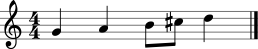

In [17]:
s = converter.parse('tinyNotation: 4/4 c4 d e8 f# g4')
s2 = s.transpose(i)
s2.show()

All intervals have properties called "simpleName" and "semiSimpleName" that become useful for reducing compound intervals (those over an octave) to smaller forms. 

In [18]:
i2 = interval.Interval('P-12')
i2.simpleName

'P5'

In [19]:
i2.directedSimpleName

'P-5'

For most intervals, `simple` and `semiSimple` mean the same thing, but while `simple` will reduce an octave to a unison, `semiSimple` treats octaves as distinct intervals.  There are certain theories where we want to consider, say, parallel octaves and parallel unisons differently (or at least display a different message to the user), but where we don't care about the difference between a third and a tenth:

In [20]:
p8 = interval.Interval('P8')
m10 = interval.Interval('m10')
(p8.simpleNiceName, m10.simpleNiceName)

('Perfect Unison', 'Minor Third')

In [21]:
(p8.semiSimpleNiceName, m10.semiSimpleNiceName)

('Perfect Octave', 'Minor Third')

Note that capitalization makes a difference in determining Major and minor:

In [22]:
interval.Interval('m3').niceName

'Minor Third'

In [23]:
interval.Interval('M3').niceName

'Major Third'

Creating diminished and Augmented intervals is as simple as using "d" and "A" in the string:

In [24]:
interval.Interval('d5').niceName

'Diminished Fifth'

In [25]:
interval.Interval('A4').niceName

'Augmented Fourth'

And, yes, multiple letters can get certain obscure intervals:

In [26]:
for intName in ['d5', 'dd5', 'ddd5', 'A4', 'AA4', 'AAA4']:
    iTemp = interval.Interval(intName)
    print(iTemp.niceName)

Diminished Fifth
Doubly-Diminished Fifth
Triply-Diminished Fifth
Augmented Fourth
Doubly-Augmented Fourth
Triply-Augmented Fourth


Up to a reasonable limit:

In [27]:
interval.Interval('dddd5').niceName

'Quadruply-Diminished Fifth'

In [28]:
interval.Interval('dddd5').transposePitch(pitch.Pitch('C4'))

<music21.pitch.Pitch G----4>

In [29]:
try:
    interval.Interval('ddddd5').niceName
except TypeError:
    print("Can't do five ds!")

Can't do five ds!


## Other ways of constructing Interval objects

The method of creating an interval from a string such as "A4" or "d5" is great if you know the interval's name in advance.  But what if you don't?  Fortunately, there are some other great ways to create them.

First, if you have two Note or Pitch objects, pass them into the `Interval` constructor as the first and second elements:

In [30]:
e = note.Note('E4')
a = note.Note('A4')
p4 = interval.Interval(e, a)
p4.niceName

'Perfect Fourth'

Or, you can create intervals from an integer, representing the number of half-steps:

In [31]:
interval.Interval(7)

<music21.interval.Interval P5>

In [32]:
for semitones in range(14):
    tempInt = interval.Interval(semitones)
    print(semitones, tempInt.niceName)

0 Perfect Unison
1 Minor Second
2 Major Second
3 Minor Third
4 Major Third
5 Perfect Fourth
6 Diminished Fifth
7 Perfect Fifth
8 Minor Sixth
9 Major Sixth
10 Minor Seventh
11 Major Seventh
12 Perfect Octave
13 Minor Ninth


Now, music theory geeks will wonder, how does `music21` know that six semitones is a "Diminished Fifth" and not an Augmented Fourth?  (Or for that matter, that three semitones is a Minor Third and not an Augmented Second or Triply-Augmented Unison?)

The answer is that it takes a good guess, but it records that the "diatonic interval" (that is "Diminished Fifth," etc.) is just a guess, or is "implicit":

In [33]:
sixSemis = interval.Interval(6)
d5 = interval.Interval('d5')
(sixSemis.implicitDiatonic, d5.implicitDiatonic)

(True, False)

This distinction makes a difference if we use these two interval objects to transpose a pitch.  Take the pitch "G flat".  A diminished fifth above it is "D double flat", but if most of us were inclined to think about "a tritone above G flat" we'd probably think of C.  The implicitDiatonic flag allows the six-semitone interval to make these sorts of intelligent decisions, while the interval that was explicitly specified to be a diminished fifth will do exactly what is asked (so long as it doesn't go to more than quadruple flat or sharp):

In [34]:
sixSemis.transposePitch(pitch.Pitch('G-'))

<music21.pitch.Pitch C>

In [35]:
d5.transposePitch(pitch.Pitch('G-'))

<music21.pitch.Pitch D-->

We can create new intervals by adding existing Intervals together:

In [36]:
i1 = interval.Interval('P5')
i2 = interval.Interval('M3')
i3 = interval.add([i1, i2])
i3

<music21.interval.Interval M7>

Here's a nice way of making sure that a major scale actually does repeat at an octave (and a demo that "W" and "H" are synonyms for whole and half steps; and that `interval.add()` can automatically convert strings to Intervals:

In [37]:
interval.add(["W", "W", "H", "W", "W", "W", "H"])

<music21.interval.Interval P8>

Or one can create new intervals by subtracting old ones:

In [38]:
interval.subtract([i1, i2])

<music21.interval.Interval m3>

Subtraction, of course, is not commutative:

In [39]:
iDown = interval.subtract([i2, i1])
iDown.directedNiceName

'Descending Minor Third'

Intervals are returned by several analysis routines in `music21`.  For instance, if you want to know the range from the lowest to the highest note in a piece:

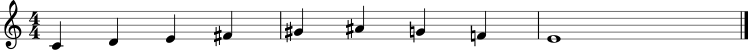

In [40]:
s = converter.parse('4/4 c4 d e f# g# a# g f e1', format="tinyNotation")
s.show()

In [41]:
s.analyze('range')

<music21.interval.Interval A6>

In [42]:
a6 = s.analyze('range')
a6.semitones

10

## Related Interval Classes

There are three other `Interval` classes in the `interval` module that can be helpful in different cases.  Two of them you've already been using without knowing it, they are the :class:`~music21.interval.DiatonicInterval` and :class:`~music21.interval.ChromaticInterval` classes, created automatically by the `Interval` object, and stored as `.diatonic` and `.chromatic` attributes: 

In [43]:
p5 = interval.Interval('P5')
p5.diatonic

<music21.interval.DiatonicInterval P5>

In [44]:
p5.chromatic

<music21.interval.ChromaticInterval 7>

The `DiatonicInterval` class handles all the under-the-hood tasks of figuring out that, say "AA6" should have a `.niceName` of "Doubly-Augmented Sixth", or that the complement of a major interval is a minor interval, etc.

The `ChromaticInterval` class keeps track of things such as the `.intervalClass`, the `.mod12` number of semitones, etc.

Unless you're doing something very complicated, you won't need to use them directly, but they're sometimes useful when you need to work around those weird corner cases, such as a doubly-diminished second, which is ascending diatonically (that is to say, a note a doubly-diminished second "above" another note will be written above it, such as E# to F-flat), but is descending chromatically (that is, the piano key for E# is higher than the one for F-flat).

In [45]:
dd2 = interval.Interval('dd2')
dd2

<music21.interval.Interval dd2>

In [46]:
dd2.semitones

-1

In [47]:
dd2.diatonic.direction

<Direction.ASCENDING: 1>

In [48]:
dd2.chromatic.direction

<Direction.DESCENDING: -1>

The related interval class that might come in handy the most is the GenericInterval class.  This class represents intervals such as "Thirds" and "Fifths" without regards to specifiers such as "Major," "minor," "diminished," "Perfect," etc.

In [49]:
gi = interval.GenericInterval('third')
gi

<music21.interval.GenericInterval 3>

Or just as easy (if one keeps track of the difference between Generic and Chromatic Intervals):

In [50]:
gi = interval.GenericInterval(3)

This interval can be used to transpose elements modally:

In [51]:
gi.transposeNote(note.Note('F#'))

<music21.note.Note A#>

_new in version 4_

Generic Intervals can also be used to do key-aware modal transpositions on Streams.

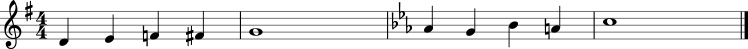

In [52]:
s = converter.parse("tinyNotation: 4/4 d4 e f f# g1 a-4 g b- a c'1")
s.measure(1).insert(0, key.Key('G'))
s.measure(3).insert(0, key.Key('c'))
s.show()

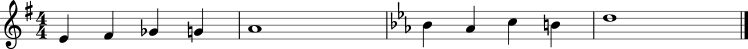

In [53]:
upASecond = interval.GenericInterval('second')
s2 = s.transpose(upASecond)
s2.show()

Notice that the chromatic alterations from the previous scale step carry over after the transposition, so that, for instance, the new version of the first measure ends up having the enharmonically equivalent F# and G-flat directly following each other.  In this case, probably what would be wanted is to run a getEnharmonic call on the notes afterwards.  In the second key, however, the pattern of notes ends up preserving the exact chromatic distances, almost creating the BACH motive (BAsCH?).

Enough about intervals for now; we'll come back to them when we analyze pieces more deeply. For now, let's get back to rhythms, and look at some of the more complex rhythmic devices we haven't considered yet, in :ref:`Chapter 19, Advanced Durations <usersGuide_19_duration2>`